In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
print(mpl.__version__)

3.2.1


기본값 설정  

1.1. rcParams  
- 그래프, 폰트 등의 기본값을 설정함
- plt.rcParams, mpl.rcParams 모두 동일한 결과를 도출함
- 사용 가능한 rcParams 항목 : plt.rcParams
- 초기값으로 되돌리기 : mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['figure.dpi'] = 72
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.grid'] = True

plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.transparent'] = True

plt.rcParams['font.family'] = 'Dejavu Sans'
plt.rcParams['font.size'] = 14

plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

1.2 rc  
- 1.1에서 설명한 plt.rcParams는 warning message가 보일때가 있음
- matplotlib.rc() 를 사용하면 warning message 없이 기본 설정을 변경 할 수 있음
- mpl.rc()와 plt.rc()는 동일하게 작동되므로 편한 것 사용

In [3]:
from matplotlib import rc

rc('figure', figsize=(5, 5))
rc('lines', linewidth=4)
rc('axes', grid=True)

rc('lines', linewidth=2, color='r')
rc('savefig', dpi=200, transparent=True)
rc('font', family='Denaju Sans', size=14)

plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

- 같은 항목(lines 등)은 한 줄로 여러 속성을 동시에 정의 가능
- 이 특징을 확장하면 다음처럼 dictionary 형태로 관리 가능

In [6]:
font = {'family' : 'Denaju Sans', 'size' : 14, 'weight' : 'bold'}
rc('font', **font)

- 설정을 초기값으로 복원하려면 mpl.rcdefaults() 를 실행하면 됨

1.3. style sheets  
- 그래프 배경색, 색상 표, 폰트, 선 굵기 등이 일괄적으로 정해진 세트
- 사용 가능한 style 항목 : plt.style.available
- 기본 설정으로 되돌리기 : plt.style.use('default')

findfont: Font family ['Denaju Sans'] not found. Falling back to DejaVu Sans.


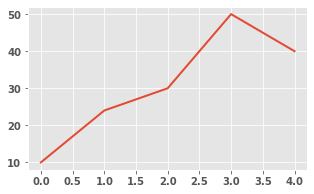

In [8]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(5, 3))

data = [10, 24, 30, 50, 40]
ax.plot(data)
plt.show()

1.4. rc_file : 기본값 custom 설정 파일
- 1.1 ~ 1.3은 필요할 때 기본값 설정을 변경하는 일임
- EDA Jupyter Notebook을 하나 만들때, 초기값들을 잡아놓고 실행 할 수 있음

In [9]:
mplfile = mpl.matplotlib_fname()
print(mplfile)

/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [10]:
!cat /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc 

#### MATPLOTLIBRC FORMAT

## This is a sample matplotlib configuration file - you can find a copy
## of it on your system in site-packages/matplotlib/mpl-data/matplotlibrc
## (which related to your Python installation location).
##
## If you edit it there, please note that it will be overwritten in your
## next install.  If you want to keep a permanent local copy that will not
## be overwritten, place it in one of the following locations:
## unix/linux:
##     $HOME/.config/matplotlib/matplotlibrc OR
##     $XDG_CONFIG_HOME/matplotlib/matplotlibrc (if $XDG_CONFIG_HOME is set)
## other platforms:
##     $HOME/.matplotlib/matplotlibrc
##
## See https://matplotlib.org/users/customizing.html#the-matplotlibrc-file
## for more details on the paths which are checked for the configuration file.
##
## This file is best viewed in a editor which supports python mode syntax
## highlighting.  Blank lines, or lines starting with a comment symbol, are
## ignored, as are trailing comments.  Other line

2. Font

  - 그래프에 들어가는 글자들의 폰트를 설정
  - plt.subtitle, ax.title, ax.xlabel, axes.xticklabels, ax.annotate, ax.text로 폰트 설정

2.1. mpl.font_manager.FontProperties

  - FontProperties를 이용해 폰트 종류, 크기, 스타일 등을 설정한 후 text 입력시 fontproperties= 로 입력함

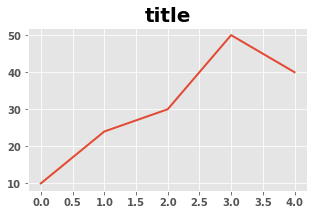

In [12]:
# font setting
font_setting0 = mpl.font_manager.FontProperties()
font_setting0.set_family('Dejavu Sans') # 'serif', 'sans-sefit', 'cursive', 'fantasy', 'monospace'
font_setting0.set_size(20)
font_setting0.set_style('normal') # 'normal', 'oblique', 'italic'
font_setting0.set_weight('bold')

fig, ax = plt.subplots(figsize=(5, 3))

data = [10, 24, 30, 50, 40]
ax.plot(data)
ax.set_title('title', fontproperties=font_setting0)

plt.show()

2.3. 글자가 깨질 때

- matplotlib은 -(minus)기호를 표시할 때 unicode minus(U+2212)를 ASCII hypen(U+002D) 보다 우선적으로 사용
- plt.rcParams['axes.unicode_minus'] = False 를 통해 ASCII hypen을 우선 사용하도록 변경할 수 있으나, 그래도 깨져서 출력될수 있음
- non-latin graph가 제대로 표시되지 않는 경우에는 font.family 앞에 새 폰트를 넣어주는 방식으로 해결 가능

In [87]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(font_list)

['/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBo

In [94]:
plt.style.use('default')

In [92]:
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

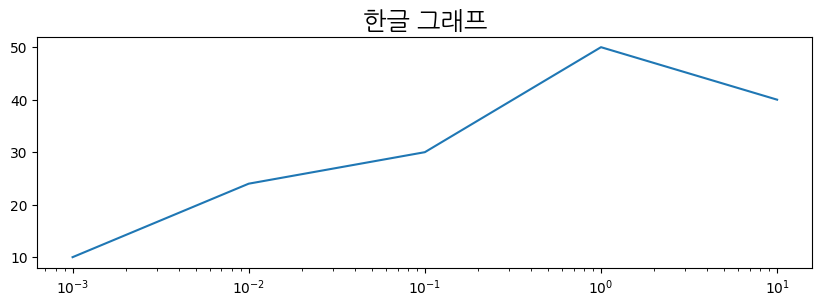

In [96]:
plt.rcParams['font.size'] = 10

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

fig, ax = plt.subplots(figsize=(10,3))

data_x = [0.001, 0.01, 0.1, 1, 10]
data_y = [10, 24, 30, 50, 40]
ax.plot(data_x, data_y)
ax.set_title('한글 그래프', fontproperties=fontprop)
ax.set_xscale('log')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (50,) and (5,)

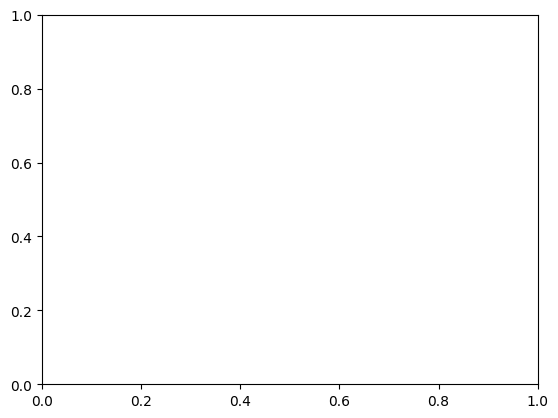

In [95]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.show()